In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as asc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = 'Data_processed/train'
valid_path = 'Data_processed/valid'
test_path = 'Data_processed/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(48,48), batch_size=50)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(48,48), batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(48,48), batch_size=20, shuffle=False)

Found 21200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
test_batches.class_indices

{'female': 0, 'male': 1}

## Conv Net

In [6]:
model = Sequential()

input_shape = (48,48,3)
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

^^Note the number of trainable parameters

## Compile and Train

In [8]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
H = model.fit_generator(generator=train_batches, steps_per_epoch=424, 
    validation_data=valid_batches, validation_steps=20, epochs=20, verbose=2)


Epoch 1/20
 - 203s - loss: 0.3825 - accuracy: 0.8426 - val_loss: 0.2535 - val_accuracy: 0.8250
Epoch 2/20
 - 197s - loss: 0.2398 - accuracy: 0.9039 - val_loss: 0.1331 - val_accuracy: 0.9225
Epoch 3/20
 - 197s - loss: 0.1855 - accuracy: 0.9290 - val_loss: 0.1346 - val_accuracy: 0.9500
Epoch 4/20
 - 197s - loss: 0.1544 - accuracy: 0.9424 - val_loss: 0.0460 - val_accuracy: 0.9425
Epoch 5/20
 - 196s - loss: 0.1217 - accuracy: 0.9576 - val_loss: 0.2018 - val_accuracy: 0.9275
Epoch 6/20
 - 196s - loss: 0.1009 - accuracy: 0.9654 - val_loss: 0.0303 - val_accuracy: 0.9400
Epoch 7/20
 - 196s - loss: 0.0808 - accuracy: 0.9743 - val_loss: 0.2766 - val_accuracy: 0.9350
Epoch 8/20
 - 197s - loss: 0.0640 - accuracy: 0.9795 - val_loss: 0.0586 - val_accuracy: 0.9500
Epoch 9/20
 - 196s - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0063 - val_accuracy: 0.9675
Epoch 10/20
 - 196s - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.1783 - val_accuracy: 0.9575
Epoch 11/20
 - 196s - loss: 0.0420 - accuracy: 0

## Plot Graph

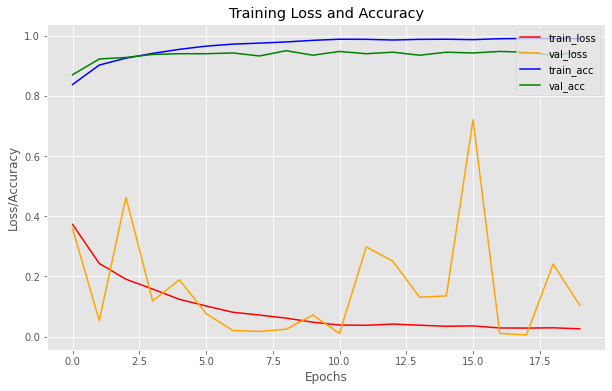

In [10]:
epochs = 20

plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss", color='r')
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", color='orange')
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc", color='b')
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", color='green')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

plt.savefig("plot.png")

## Testing

In [12]:
test_labels = test_batches.classes

In [13]:
predictions = model.predict_generator(generator=test_batches, steps=10, verbose=0)

In [14]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print(f"Confusion Matrix:\n{cm}")
accuracy = asc(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print(f"\nAccuracy:{accuracy}")

Confusion Matrix:
[[90 10]
 [ 2 98]]

Accuracy:0.94


## Save Model

In [15]:
gender_json = model.to_json()
with open("gender.json","w") as json_file:
    json_file.write(gender_json)
model.save_weights("gender_wts.h5")

## Load and Predict

In [3]:
from keras.models import model_from_json

In [4]:
model = model_from_json(open("gender.json", "r").read())

In [5]:
model.load_weights("gender_wts.h5")

In [17]:
from PIL import Image
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')
    np_image = transform.resize(np_image, (48, 48, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('test3.jpg')
x = model.predict(image)[0][0]
x

0.007120744